# Installing Dependencies

In [2]:
!pip install tensorflow opencv-python matplotlib

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/ec/6c/fab8113424af5049f85717e8e527ca3773299a3c6b02506e66436e19874f/opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 1.5 MB/s eta 0:00:27
   ---------------------------------------- 0.4/38.8 MB 2.9 MB/s eta 0:00:14
    --------------------------------------- 0.7/38.8 MB 4.6 MB/s eta 0:00:09
    --------------------------------------- 0.7/38.8 MB 3.6 MB/s eta 0:00:11
   - -------------------------------------- 1.3/38.8 MB 4.4 MB/s eta 0:00:09
   - -------------------------------------- 1.7/38.8 MB 5.3 MB/s eta 0:00:07
   -- ------------------------------------- 2.0/38.8 MB 5.9 MB/s eta 0:00:07
   -- ------------------------------------- 2.5/38.8 MB 6.3 MB/s eta 0:00:06
   -- ----------------

In [4]:
import tensorflow as tf
import os

# Removing dodgy images

In [7]:
import cv2
import imghdr

C:\Users\htals\AppData\Local\Temp\ipykernel_22976\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [8]:
data_dir = 'data' 

In [9]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# Load Data

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

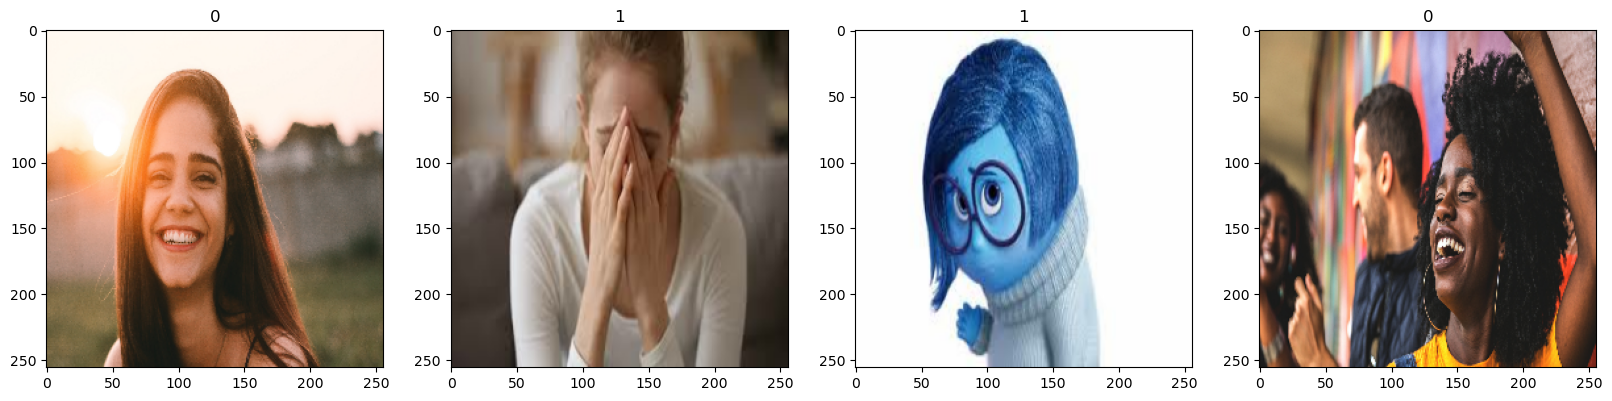

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scaling the Data

In [16]:
data = data.map(lambda x,y: (x/255, y))

In [17]:
data.as_numpy_iterator().next()

(array([[[[0.9607843 , 0.9607843 , 0.9607843 ],
          [0.9607843 , 0.9607843 , 0.9607843 ],
          [0.9607843 , 0.9607843 , 0.9607843 ],
          ...,
          [0.9607843 , 0.9607843 , 0.9607843 ],
          [0.9607843 , 0.9607843 , 0.9607843 ],
          [0.9607843 , 0.9607843 , 0.9607843 ]],
 
         [[0.9607843 , 0.9607843 , 0.9607843 ],
          [0.9607843 , 0.9607843 , 0.9607843 ],
          [0.9607843 , 0.9607843 , 0.9607843 ],
          ...,
          [0.9607843 , 0.9607843 , 0.9607843 ],
          [0.9607843 , 0.9607843 , 0.9607843 ],
          [0.9607843 , 0.9607843 , 0.9607843 ]],
 
         [[0.9607843 , 0.9607843 , 0.9607843 ],
          [0.9607843 , 0.9607843 , 0.9607843 ],
          [0.9607843 , 0.9607843 , 0.9607843 ],
          ...,
          [0.9607843 , 0.9607843 , 0.9607843 ],
          [0.9607843 , 0.9607843 , 0.9607843 ],
          [0.9607843 , 0.9607843 , 0.9607843 ]],
 
         ...,
 
         [[0.9607843 , 0.9607843 , 0.9607843 ],
          [0.96078

# Splitting the Data

In [18]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [19]:
train_size

7

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Build Deep Learning Model

In [21]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
model = Sequential()

In [24]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# Train

In [26]:
logdir='logs'

In [27]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [28]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


7/7 [==============================] - 12s 1s/step - loss: 0.9606 - accuracy: 0.5000 - val_loss: 0.7204 - val_accuracy: 0.4844
Epoch 2/20
7/7 [==============================] - 7s 745ms/step - loss: 0.6610 - accuracy: 0.5402 - val_loss: 0.6631 - val_accuracy: 0.7812
Epoch 3/20
7/7 [==============================] - 7s 671ms/step - loss: 0.6208 - accuracy: 0.7321 - val_loss: 0.5553 - val_accuracy: 0.8125
Epoch 4/20
7/7 [==============================] - 6s 665ms/step - loss: 0.4940 - accuracy: 0.7679 - val_loss: 0.4799 - val_accuracy: 0.6719
Epoch 5/20
7/7 [==============================] - 6s 629ms/step - loss: 0.4037 - accuracy: 0.8036 - val_loss: 0.3192 - val_accuracy: 0.8750
Epoch 6/20
7/7 [==============================] - 7s 697ms/step - loss: 0.3594 - accuracy: 0.8527 - val_loss: 0.2461 - val_accuracy: 0.9219
Epoch 7/20
7/7 [==============================] - 7s 763ms/step - loss: 0.2808 - accuracy: 0.8973 - val_loss: 0.1917 - val_accuracy: 0.9688
Epoch 8/20
7/7 [====

# Plot Performance

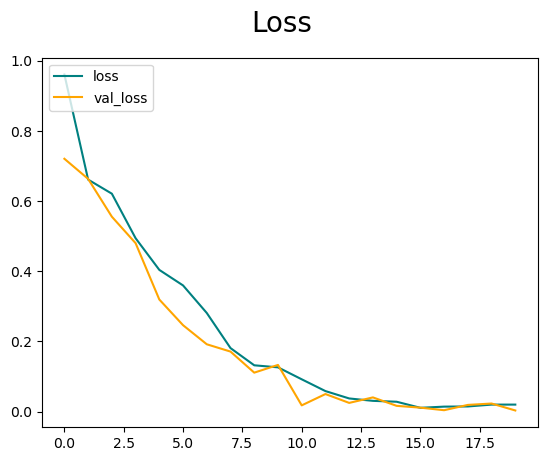

In [29]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

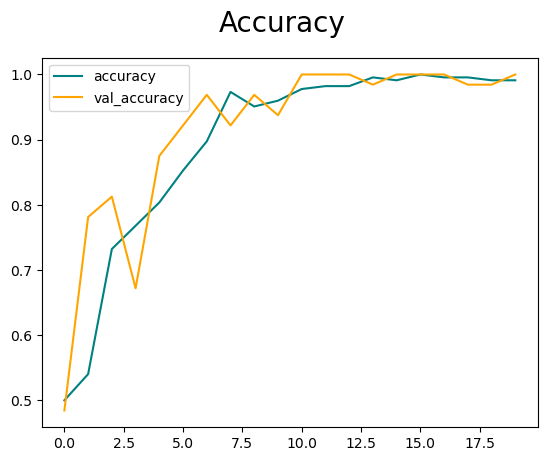

In [30]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluation

In [31]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [32]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [33]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 250ms/step


In [34]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# Testing on new image

In [35]:
import cv2

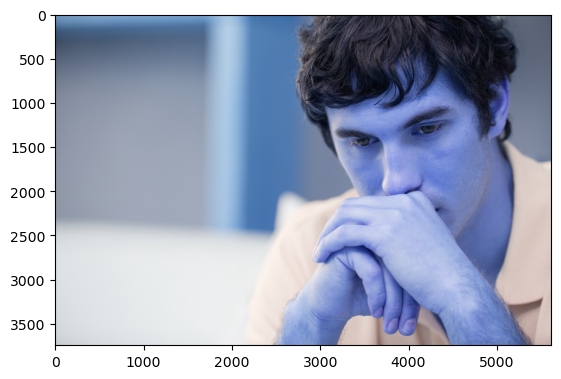

In [41]:
img = cv2.imread('8iAb9k4aT.jpg')
plt.imshow(img)
plt.show()

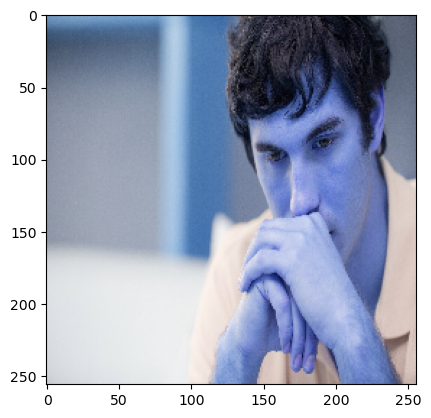

In [42]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [43]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 32ms/step


In [44]:
yhat

array([[0.99675775]], dtype=float32)

In [45]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# Saving the Model

In [46]:
from tensorflow.keras.models import load_model

In [48]:
model.save(os.path.join('models','howisthemood.h5'))

C:\Users\htals\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [53]:
new_model = load_model(os.path.join('models','howisthemood.h5'))

In [54]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 101ms/step


array([[0.99675775]], dtype=float32)